## Libs and gdrive connection

In [189]:
PROJECT_FOLDER = '/content/drive/MyDrive/ColabNotebooks/!_python4data/regression/soglasie_data'

def connect_gdrive(PROJECT_FOLDER):
    from google.colab import drive
    import os

    drive.mount('/content/drive')
    os.chdir(PROJECT_FOLDER)
    print('Now current folder is: ', os.getcwd())

connect_gdrive(PROJECT_FOLDER)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Now current folder is:  /content/drive/MyDrive/ColabNotebooks/!_python4data/regression/soglasie_data


In [190]:
from statsmodels.formula.api import ols, logit
from statsmodels.api import qqplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plot_styles_list = [
    'seaborn',
    'fivethirtyeight',
    'seaborn-pastel',
    'seaborn-whitegrid',
    'ggplot',
    'grayscale'
    'bmh',
]

<ipython-input-190-dd0c8bec09c0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data uploading

In [4]:
df_q = pd.read_excel(
    'data_soglasie_mmm.xlsx', 
    sheet_name='quarters',
    index_col='date', 
    parse_dates=True
)
df_q['media_spends_online_mln'] = df_q['media_spends_online'].div(1_000_000)
df_q['media_spends_offline_mln'] = df_q['media_spends_offline'].div(1_000_000)
df_q['media_spends_overall_mln'] = df_q['media_spends_overall'].div(1_000_000)
df_q['competitors_media_spends_mln'] = df_q['competitors_media_spends'].div(1_000_000)

df_q

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln
date,,,,,,,,,,,,,,,
2020_3,64.4,8.5,10.7,2.8,38.1,5.1,1616153.0,8.255496e+06,9.871649e+06,2.602571e+07,0,8.255496,1.616153,9.871649,26.025708
2020_4,58.9,8.4,12.6,3.5,35.9,6.1,3225464.0,6.621170e+06,9.846634e+06,3.245661e+06,0,6.621170,3.225464,9.846634,3.245661
2021_1,60.9,8.7,11.2,3.4,39.5,5.2,1353543.4,6.457148e+06,7.810691e+06,1.401574e+08,0,6.457148,1.353543,7.810691,140.157352
2021_2,60.2,7.2,10.0,3.2,37.4,5.4,1283492.1,5.363008e+06,6.646500e+06,1.577957e+08,0,5.363008,1.283492,6.646500,157.795682
2021_3,60.5,7.6,11.1,3.3,38.7,5.7,1234679.6,5.912951e+06,7.147630e+06,6.944523e+07,0,5.912951,1.234680,7.147630,69.445227
2021_4,60.1,7.0,11.4,2.8,38.3,4.6,440580.8,3.510804e+06,3.951384e+06,4.590188e+07,0,3.510804,0.440581,3.951384,45.901882
2022_1,58.3,6.2,11.3,3.0,38.5,5.7,38795.4,2.149485e+06,2.188281e+06,2.510140e+08,0,2.149485,0.038795,2.188281,251.014012
2022_2,55.3,6.5,9.1,3.6,33.6,4.7,38795.4,1.557592e+06,1.596388e+06,5.455023e+07,0,1.557592,0.038795,1.596388,54.550225
2022_3,55.3,6.5,9.6,3.0,34.2,5.2,38795.4,1.757786e+06,1.796582e+06,1.729386e+08,0,1.757786,0.038795,1.796582,172.938605


In [ ]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2020_3 to 2022_4
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   awareness_aided               10 non-null     float64
 1   awareness_unaided             10 non-null     float64
 2   usage                         10 non-null     float64
 3   usage_often                   10 non-null     float64
 4   consideration                 10 non-null     float64
 5   usage_most_frequent           10 non-null     float64
 6   media_spends_offline          10 non-null     float64
 7   media_spends_online           10 non-null     float64
 8   media_spends_overall          10 non-null     float64
 9   competitors_media_spends      10 non-null     float64
 10  brand_search                  10 non-null     int64  
 11  media_spends_online_mln       10 non-null     float64
 12  media_spends_offline_mln      10 non-null     float64
 13  med

In [5]:
df = pd.read_excel(
    'data_soglasie_mmm.xlsx', 
    sheet_name='months',
    index_col='date', 
    parse_dates=True
)
df.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search
date,,,,,,,,,,,
2021-04-01,62.6,7.4,10.5,3.2,40.4,6.6,427830.7,1.854515e+06,2.282345e+06,18348148.65,0
2021-05-01,56.3,6.8,8.2,1.8,31.9,3.6,427830.7,1.753314e+06,2.181144e+06,77505590.33,0
2021-06-01,61.8,7.6,11.2,4.6,39.8,6.0,427830.7,1.755180e+06,2.183010e+06,61941942.96,0
2021-07-01,61.0,7.2,9.4,2.2,38.0,5.4,434803.6,1.758567e+06,2.193371e+06,18465904.45,0
2021-08-01,60.4,7.0,12.5,3.6,38.7,5.4,399938.0,2.567713e+06,2.967651e+06,49853603.90,0


In [6]:
df['media_spends_online_mln'] = df['media_spends_online'].div(1_000_000)

df['media_spends_offline_mln'] = df['media_spends_offline'].div(1_000_000)

df['media_spends_overall_mln'] = df['media_spends_overall'].div(1_000_000)

df['competitors_media_spends_mln'] = df['competitors_media_spends'].div(1_000_000)


df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-04-01 to 2022-12-01
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   awareness_aided               21 non-null     float64
 1   awareness_unaided             21 non-null     float64
 2   usage                         21 non-null     float64
 3   usage_often                   21 non-null     float64
 4   consideration                 21 non-null     float64
 5   usage_most_frequent           21 non-null     float64
 6   media_spends_offline          21 non-null     float64
 7   media_spends_online           21 non-null     float64
 8   media_spends_overall          21 non-null     float64
 9   competitors_media_spends      21 non-null     float64
 10  brand_search                  21 non-null     int64  
 11  media_spends_online_mln       21 non-null     float64
 12  media_spends_offline_mln      21 non-null     

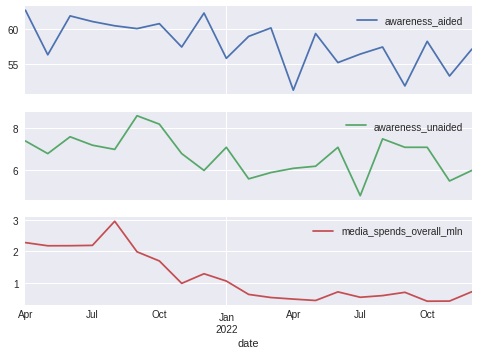

In [ ]:
df[['awareness_aided', 'awareness_unaided', 'media_spends_overall_mln']].plot(subplots=True)
plt.show()

## Regression model - Aided Awareness

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_overall + 0", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                                 OLS Regression Results                                
Dep. Variable:        awareness_aided   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              51.75
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    5.78e-07
Time:                        12:10:35   Log-Likelihood:                         -101.67
No. Observations:                  21   AIC:                                      205.3
Df Residuals:                      20   BIC:                                      206.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_offline + ", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9.314
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00656
Time:                        12:10:48   Log-Likelihood:                -49.790
No. Observations:                  21   AIC:                             103.6
Df Residuals:                      19   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.2331 

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_offline + media_spends_online + competitors_media_spends", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     2.799
Date:                Mon, 20 Mar 2023   Prob (F-statistic):             0.0715
Time:                        12:20:31   Log-Likelihood:                -49.764
No. Observations:                  21   AIC:                             107.5
Df Residuals:                      17   BIC:                             111.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
model_aw_aided.params

Intercept                   5.549040e+01
media_spends_offline        3.565718e-06
media_spends_online         1.925149e-06
competitors_media_spends   -8.427497e-10
dtype: float64

In [ ]:
val = -8.427497e-10 * 1_000_000

print(f"value with supression: {val:.8f}")

value with supression: -0.00084275




*   value with supression: 55.5 - intercept
*   media_spends_offline: 3.56571800 mln
*   media_spends_online: 1.92514900 mln
*   competitors_media_spends: __
*   Новый пункт





In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_offline + media_spends_online + competitors_media_spends + 0", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                                 OLS Regression Results                                
Dep. Variable:        awareness_aided   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              44.23
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    1.65e-08
Time:                        12:19:21   Log-Likelihood:                         -92.775
No. Observations:                  21   AIC:                                      191.5
Df Residuals:                      18   BIC:                                      194.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
model_aw_aided.params * 1_000_000

media_spends_offline       -101.778092
media_spends_online          54.650026
competitors_media_spends      0.178836
dtype: float64

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_overall", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9.314
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00656
Time:                        12:24:24   Log-Likelihood:                -49.790
No. Observations:                  21   AIC:                             103.6
Df Residuals:                      19   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.2331 

In [ ]:
print(f"Intercept: {model_aw_aided.params[0]:.8f}")


for val in model_aw_aided.params[1:]:
    print(f"Increment per 1 mln of investment: {val * 1_000_000:.8f}")

Intercept: 55.23305965
Increment per 1 mln of investment: 2.31097965


In [ ]:
df.columns

Index(['awareness_aided', 'awareness_unaided', 'usage', 'usage_often',
       'consideration', 'usage_most_frequent', 'media_spends_offline',
       'media_spends_online', 'media_spends_overall',
       'competitors_media_spends', 'brand_search'],
      dtype='object')

In [ ]:
# df['media_spends_online_mln'] = df['media_spends_online'].div(1_000_000)

# df['media_spends_offline_mln'] = df['media_spends_offline'].div(1_000_000)

# df['media_spends_overall_mln'] = df['media_spends_overall'].div(1_000_000)

# df['competitors_media_spends_mln'] = df['competitors_media_spends'].div(1_000_000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-04-01 to 2022-12-01
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   awareness_aided               21 non-null     float64
 1   awareness_unaided             21 non-null     float64
 2   usage                         21 non-null     float64
 3   usage_often                   21 non-null     float64
 4   consideration                 21 non-null     float64
 5   usage_most_frequent           21 non-null     float64
 6   media_spends_offline          21 non-null     float64
 7   media_spends_online           21 non-null     float64
 8   media_spends_overall          21 non-null     float64
 9   competitors_media_spends      21 non-null     float64
 10  brand_search                  21 non-null     int64  
 11  media_spends_online_mln       21 non-null     float64
 12  media_spends_offline_mln      21 non-null     

In [ ]:
df.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln
date,,,,,,,,,,,,,,,
2021-04-01,62.6,7.4,10.5,3.2,40.4,6.6,427830.7,1.854515e+06,2.282345e+06,18348148.65,0,1.854515,0.427831,2.282345,18.348149
2021-05-01,56.3,6.8,8.2,1.8,31.9,3.6,427830.7,1.753314e+06,2.181144e+06,77505590.33,0,1.753314,0.427831,2.181144,77.505590
2021-06-01,61.8,7.6,11.2,4.6,39.8,6.0,427830.7,1.755180e+06,2.183010e+06,61941942.96,0,1.755180,0.427831,2.183010,61.941943
2021-07-01,61.0,7.2,9.4,2.2,38.0,5.4,434803.6,1.758567e+06,2.193371e+06,18465904.45,0,1.758567,0.434804,2.193371,18.465904
2021-08-01,60.4,7.0,12.5,3.6,38.7,5.4,399938.0,2.567713e+06,2.967651e+06,49853603.90,0,2.567713,0.399938,2.967651,49.853604


### Overall media and comp-s

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_overall_mln + competitors_media_spends_mln", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     4.416
Date:                Mon, 20 Mar 2023   Prob (F-statistic):             0.0275
Time:                        12:41:04   Log-Likelihood:                -49.786
No. Observations:                  21   AIC:                             105.6
Df Residuals:                      18   BIC:                             108.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

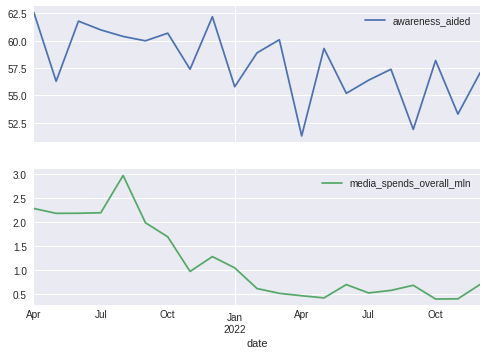

In [ ]:
df[['awareness_aided', 'media_spends_overall_mln']].plot(subplots=True)
plt.show()

In [ ]:
df[['awareness_aided', 'media_spends_overall_mln']].corr()

,awareness_aided,media_spends_overall_mln
awareness_aided,1.000000,0.573546
media_spends_overall_mln,0.573546,1.000000


### Different media and competitors

In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_online_mln + media_spends_offline_mln + competitors_media_spends_mln", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     2.799
Date:                Mon, 20 Mar 2023   Prob (F-statistic):             0.0715
Time:                        12:40:31   Log-Likelihood:                -49.764
No. Observations:                  21   AIC:                             107.5
Df Residuals:                      17   BIC:                             111.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Новый раздел

# Новый раздел

In [ ]:
df

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln
date,,,,,,,,,,,,,,,
2021-04-01,62.6,7.4,10.5,3.2,40.4,6.6,427830.7,1.854515e+06,2.282345e+06,1.834815e+07,0,1.854515,0.427831,2.282345,18.348149
2021-05-01,56.3,6.8,8.2,1.8,31.9,3.6,427830.7,1.753314e+06,2.181144e+06,7.750559e+07,0,1.753314,0.427831,2.181144,77.505590
2021-06-01,61.8,7.6,11.2,4.6,39.8,6.0,427830.7,1.755180e+06,2.183010e+06,6.194194e+07,0,1.755180,0.427831,2.183010,61.941943
2021-07-01,61.0,7.2,9.4,2.2,38.0,5.4,434803.6,1.758567e+06,2.193371e+06,1.846590e+07,0,1.758567,0.434804,2.193371,18.465904
2021-08-01,60.4,7.0,12.5,3.6,38.7,5.4,399938.0,2.567713e+06,2.967651e+06,4.985360e+07,0,2.567713,0.399938,2.967651,49.853604
2021-09-01,60.0,8.6,11.6,4.2,39.4,6.4,399938.0,1.586671e+06,1.986609e+06,1.125719e+06,0,1.586671,0.399938,1.986609,1.125719
2021-10-01,60.7,8.2,11.8,3.8,39.4,5.0,413485.6,1.280026e+06,1.693512e+06,1.650574e+06,0,1.280026,0.413486,1.693512,1.650574
2021-11-01,57.4,6.8,11.6,2.0,37.1,4.0,13547.6,9.612846e+05,9.748322e+05,4.363698e+07,0,0.961285,0.013548,0.974832,43.636977
2021-12-01,62.2,6.0,10.8,2.8,38.4,4.8,13547.6,1.269493e+06,1.283040e+06,6.143316e+05,0,1.269493,0.013548,1.283040,0.614332


### All media and no comp-s (signific): aided awareness : 2.3

p is good

r-square is poor


In [ ]:
# Create the model object
model_aw_aided = ols(
    "awareness_aided ~ media_spends_overall_mln", 
    data=df).fit()

# Print the parameters of the fitted model
print(model_aw_aided.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9.314
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00656
Time:                        13:16:53   Log-Likelihood:                -49.790
No. Observations:                  21   AIC:                             103.6
Df Residuals:                      19   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
model_aw_aided.mse_resid

7.4191659663286575

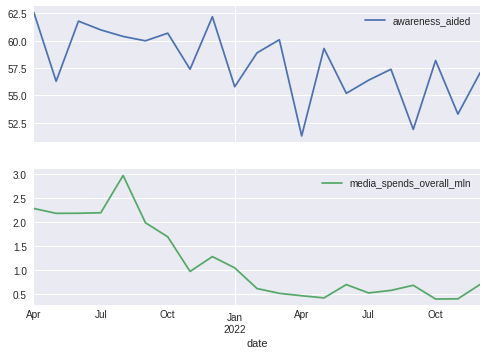

In [ ]:
df[['awareness_aided', 'media_spends_overall_mln']].plot(subplots=True)
plt.show()

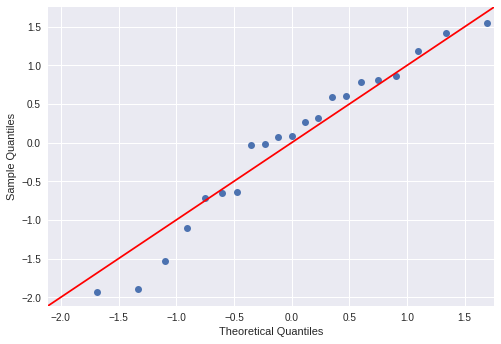

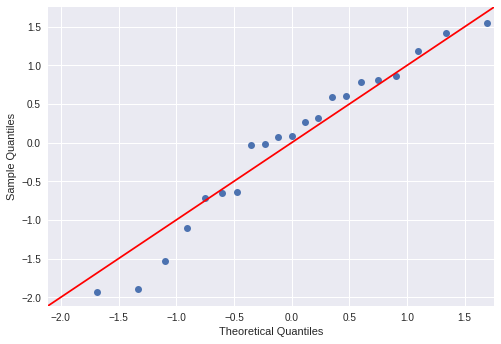

In [ ]:
# from statsmodels.api import qqplot

qqplot(
    data=model_aw_aided.resid, 
    fit=True,
    line='45'
)

In [ ]:
# BAD

model_aw_aided_no_intercept = ols(
    "awareness_aided ~ media_spends_overall_mln + 0", 
    data=df).fit()

print(model_aw_aided_no_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:        awareness_aided   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              51.75
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    5.78e-07
Time:                        13:25:36   Log-Likelihood:                         -101.67
No. Observations:                  21   AIC:                                      205.3
Df Residuals:                      20   BIC:                                      206.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Unaided Awareness

In [ ]:
model_aw_unaided = ols(
    "awareness_unaided ~ media_spends_overall_mln + 0", 
    data=df).fit()

print(model_aw_unaided.summary())

                                 OLS Regression Results                                
Dep. Variable:      awareness_unaided   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              60.23
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    1.86e-07
Time:                        13:00:13   Log-Likelihood:                         -55.478
No. Observations:                  21   AIC:                                      113.0
Df Residuals:                      20   BIC:                                      114.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Unaided awareness: beta = 0.637 per a mln of investment

In [ ]:
model_aw_unaided = ols(
    "awareness_unaided ~ media_spends_overall_mln", 
    data=df).fit()

print(model_aw_unaided.summary())

                            OLS Regression Results                            
Dep. Variable:      awareness_unaided   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     8.311
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00953
Time:                        13:03:58   Log-Likelihood:                -23.923
No. Observations:                  21   AIC:                             51.85
Df Residuals:                      19   BIC:                             53.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
df.columns

Index(['awareness_aided', 'awareness_unaided', 'usage', 'usage_often',
       'consideration', 'usage_most_frequent', 'media_spends_offline',
       'media_spends_online', 'media_spends_overall',
       'competitors_media_spends', 'brand_search', 'media_spends_online_mln',
       'media_spends_offline_mln', 'media_spends_overall_mln',
       'competitors_media_spends_mln'],
      dtype='object')

## Quarter Model


### Aided Awareness

In [ ]:
# BAD

model_aw_aided_q = ols(
    "awareness_aided ~ media_spends_overall_mln + 0", 
    data=df_q).fit()

print(model_aw_aided_q.summary())

                                 OLS Regression Results                                
Dep. Variable:        awareness_aided   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              27.82
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    0.000511
Time:                        13:09:56   Log-Likelihood:                         -47.933
No. Observations:                  10   AIC:                                      97.87
Df Residuals:                       9   BIC:                                      98.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Signific: Aided Awareness: 0.68

In [ ]:
# GOOD


model_aw_aided_q = ols(
    "awareness_aided ~ media_spends_overall_mln", 
    data=df_q).fit()

print(model_aw_aided_q.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     15.63
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00421
Time:                        13:17:07   Log-Likelihood:                -18.739
No. Observations:                  10   AIC:                             41.48
Df Residuals:                       8   BIC:                             42.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
df_q.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln
date,,,,,,,,,,,,,,,
2020_3,64.4,8.5,10.7,2.8,38.1,5.1,1616153.0,8.255496e+06,9.871649e+06,2.602571e+07,0,8.255496,1.616153,9.871649,26.025708
2020_4,58.9,8.4,12.6,3.5,35.9,6.1,3225464.0,6.621170e+06,9.846634e+06,3.245661e+06,0,6.621170,3.225464,9.846634,3.245661
2021_1,60.9,8.7,11.2,3.4,39.5,5.2,1353543.4,6.457148e+06,7.810691e+06,1.401574e+08,0,6.457148,1.353543,7.810691,140.157352
2021_2,60.2,7.2,10.0,3.2,37.4,5.4,1283492.1,5.363008e+06,6.646500e+06,1.577957e+08,0,5.363008,1.283492,6.646500,157.795682
2021_3,60.5,7.6,11.1,3.3,38.7,5.7,1234679.6,5.912951e+06,7.147630e+06,6.944523e+07,0,5.912951,1.234680,7.147630,69.445227


### media separately - bad

In [ ]:
# BAD


model_aw_aided_q_media_types = ols(
    "awareness_aided ~ media_spends_online_mln + media_spends_offline_mln", 
    data=df_q).fit()

print(model_aw_aided_q_media_types.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     33.43
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           0.000262
Time:                        08:01:42   Log-Likelihood:                -12.374
No. Observations:                  10   AIC:                             30.75
Df Residuals:                       7   BIC:                             31.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Unaided awareness: signific:  0.2685

In [ ]:
model_aw_unaided_q = ols(
    "awareness_unaided ~ media_spends_overall_mln", 
    data=df_q).fit()

print(model_aw_unaided_q.summary())

                            OLS Regression Results                            
Dep. Variable:      awareness_unaided   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     64.93
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.15e-05
Time:                        13:13:19   Log-Likelihood:                -2.3242
No. Observations:                  10   AIC:                             8.648
Df Residuals:                       8   BIC:                             9.254
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Usage ~ Awareness

### Monthly data

In [ ]:
df.columns

Index(['awareness_aided', 'awareness_unaided', 'usage', 'usage_often',
       'consideration', 'usage_most_frequent', 'media_spends_offline',
       'media_spends_online', 'media_spends_overall',
       'competitors_media_spends', 'brand_search', 'media_spends_online_mln',
       'media_spends_offline_mln', 'media_spends_overall_mln',
       'competitors_media_spends_mln'],
      dtype='object')

#### usage ~ awareness_aided: 0.1763 beta

In [ ]:
model_aw_usage_aided = ols(
    " usage ~ awareness_aided + 0 ", 
    data=df).fit()

print(model_aw_usage_aided.summary())

                                 OLS Regression Results                                
Dep. Variable:                  usage   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              1309.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    1.06e-19
Time:                        13:40:06   Log-Likelihood:                         -34.745
No. Observations:                  21   AIC:                                      71.49
Df Residuals:                      20   BIC:                                      72.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

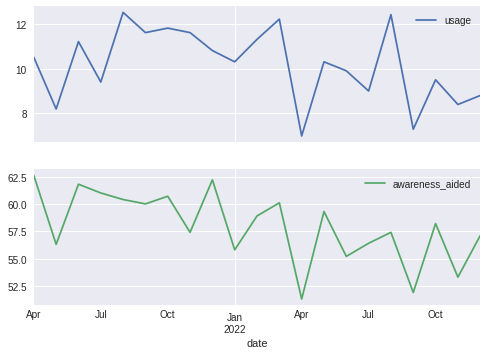

In [ ]:
df[['usage', 'awareness_aided']].plot(subplots=True)
plt.show()

In [ ]:
df[['usage', 'awareness_aided']].corr()

,usage,awareness_aided
usage,1.000000,0.712496
awareness_aided,0.712496,1.000000


#### unaided

In [ ]:
model_aw_usage_unaided = ols(
    " usage ~ awareness_unaided + 0 ", 
    data=df).fit()

print(model_aw_usage_unaided.summary())

                                 OLS Regression Results                                
Dep. Variable:                  usage   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              717.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    3.83e-17
Time:                        13:41:40   Log-Likelihood:                         -40.924
No. Observations:                  21   AIC:                                      83.85
Df Residuals:                      20   BIC:                                      84.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

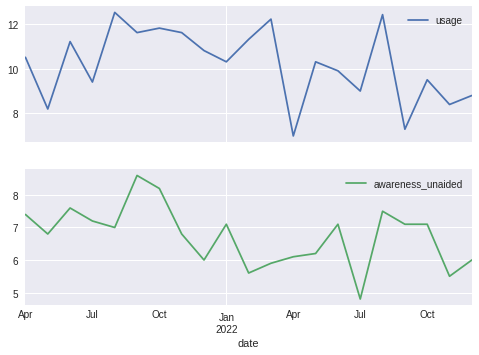

In [ ]:
df[['usage', 'awareness_unaided']].plot(subplots=True)
plt.show()

In [ ]:
df[['usage', 'awareness_unaided']].corr()

,usage,awareness_unaided
usage,1.000000,0.351508
awareness_unaided,0.351508,1.000000


## Results - resume

In [ ]:
media_investment_effect = pd.DataFrame({
    'aided_awareness' : [2.3, 0.68], 
    'unaided_awareness' : [0.637, 0.2685], 
    'period_type_data': ['monthly data', 'quarter data']
})

media_investment_effect.set_index('period_type_data', inplace=True)

media_investment_effect

,aided_awareness,unaided_awareness
period_type_data,,
monthly data,2.30,0.6370
quarter data,0.68,0.2685


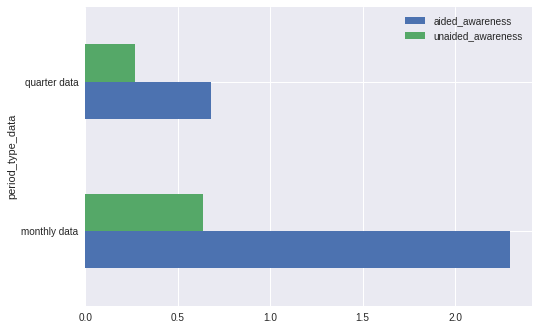

In [ ]:
media_investment_effect.plot(kind='barh')

plt.show()

In [ ]:
df.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln
date,,,,,,,,,,,,,,,
2021-04-01,62.6,7.4,10.5,3.2,40.4,6.6,427830.7,1.854515e+06,2.282345e+06,18348148.65,0,1.854515,0.427831,2.282345,18.348149
2021-05-01,56.3,6.8,8.2,1.8,31.9,3.6,427830.7,1.753314e+06,2.181144e+06,77505590.33,0,1.753314,0.427831,2.181144,77.505590
2021-06-01,61.8,7.6,11.2,4.6,39.8,6.0,427830.7,1.755180e+06,2.183010e+06,61941942.96,0,1.755180,0.427831,2.183010,61.941943
2021-07-01,61.0,7.2,9.4,2.2,38.0,5.4,434803.6,1.758567e+06,2.193371e+06,18465904.45,0,1.758567,0.434804,2.193371,18.465904
2021-08-01,60.4,7.0,12.5,3.6,38.7,5.4,399938.0,2.567713e+06,2.967651e+06,49853603.90,0,2.567713,0.399938,2.967651,49.853604


## Logarithmic transformation

In [10]:
df_q['media_spends_overall_mln_log'] = np.log(df_q['media_spends_overall_mln'])
df_q.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln,media_spends_overall_mln_log
date,,,,,,,,,,,,,,,,
2020_3,64.4,8.5,10.7,2.8,38.1,5.1,1616153.0,8.255496e+06,9.871649e+06,2.602571e+07,0,8.255496,1.616153,9.871649,26.025708,2.289667
2020_4,58.9,8.4,12.6,3.5,35.9,6.1,3225464.0,6.621170e+06,9.846634e+06,3.245661e+06,0,6.621170,3.225464,9.846634,3.245661,2.287130
2021_1,60.9,8.7,11.2,3.4,39.5,5.2,1353543.4,6.457148e+06,7.810691e+06,1.401574e+08,0,6.457148,1.353543,7.810691,140.157352,2.055493
2021_2,60.2,7.2,10.0,3.2,37.4,5.4,1283492.1,5.363008e+06,6.646500e+06,1.577957e+08,0,5.363008,1.283492,6.646500,157.795682,1.894090
2021_3,60.5,7.6,11.1,3.3,38.7,5.7,1234679.6,5.912951e+06,7.147630e+06,6.944523e+07,0,5.912951,1.234680,7.147630,69.445227,1.966781


In [8]:
df['media_spends_overall_mln_log'] = np.log(df['media_spends_overall_mln'])
df.head()

,awareness_aided,awareness_unaided,usage,usage_often,consideration,usage_most_frequent,media_spends_offline,media_spends_online,media_spends_overall,competitors_media_spends,brand_search,media_spends_online_mln,media_spends_offline_mln,media_spends_overall_mln,competitors_media_spends_mln,media_spends_overall_mln_log
date,,,,,,,,,,,,,,,,
2021-04-01,62.6,7.4,10.5,3.2,40.4,6.6,427830.7,1.854515e+06,2.282345e+06,18348148.65,0,1.854515,0.427831,2.282345,18.348149,0.825204
2021-05-01,56.3,6.8,8.2,1.8,31.9,3.6,427830.7,1.753314e+06,2.181144e+06,77505590.33,0,1.753314,0.427831,2.181144,77.505590,0.779850
2021-06-01,61.8,7.6,11.2,4.6,39.8,6.0,427830.7,1.755180e+06,2.183010e+06,61941942.96,0,1.755180,0.427831,2.183010,61.941943,0.780705
2021-07-01,61.0,7.2,9.4,2.2,38.0,5.4,434803.6,1.758567e+06,2.193371e+06,18465904.45,0,1.758567,0.434804,2.193371,18.465904,0.785439
2021-08-01,60.4,7.0,12.5,3.6,38.7,5.4,399938.0,2.567713e+06,2.967651e+06,49853603.90,0,2.567713,0.399938,2.967651,49.853604,1.087771


In [9]:
model_aw_usage_aided_log = ols(
    " awareness_aided ~ media_spends_overall_mln_log", 
    data=df).fit()

print(model_aw_usage_aided_log.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.444
Date:                Wed, 22 Mar 2023   Prob (F-statistic):            0.00626
Time:                        09:41:03   Log-Likelihood:                -49.741
No. Observations:                  21   AIC:                             103.5
Df Residuals:                      19   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Best results for aided awareness forecasting

In [37]:
model_aw_aided_log_q = ols(
    " awareness_aided ~ media_spends_overall_mln_log", 
    data=df_q).fit()

print(model_aw_aided_log_q.summary())

                            OLS Regression Results                            
Dep. Variable:        awareness_aided   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     20.99
Date:                Wed, 22 Mar 2023   Prob (F-statistic):            0.00180
Time:                        10:22:10   Log-Likelihood:                -17.719
No. Observations:                  10   AIC:                             39.44
Df Residuals:                       8   BIC:                             40.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Best results for unaided awareness forecasting

In [38]:
model_aw_unaided_log_q = ols(
    " awareness_unaided ~ media_spends_overall_mln_log", 
    data=df_q).fit()

print(model_aw_unaided_log_q.summary())

                            OLS Regression Results                            
Dep. Variable:      awareness_unaided   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     42.98
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           0.000177
Time:                        10:22:16   Log-Likelihood:                -4.1148
No. Observations:                  10   AIC:                             12.23
Df Residuals:                       8   BIC:                             12.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Forecasting - calculator -- do not use


In [24]:

def forecast_effect(intercept, beta, coeff_adj, min, max):
    
    def calc_predict(val, intercept, beta, coeff_adj):
        return intercept + np.log(val) * beta * coeff_adj

    media_investments = np.arange(min, max)
    awareness_predicted = [calc_predict(val,intercept, beta, coeff_adj ) for val in  media_investments ]

    result = pd.DataFrame({
        'media_investments': media_investments, 
        'awareness_predicted': awareness_predicted
    })
    return result



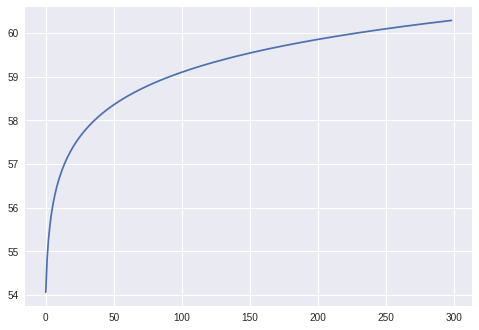

In [30]:
brand_awareness_aided = forecast_effect(
    intercept=54.06, 
    beta=3.1206, 
    coeff_adj=0.35, 
    min=1, 
    max=300
)

brand_awareness_aided['awareness_predicted'].plot()



plt.show()

## Logit functions -- bad results

In [31]:
# normalization

df_q['awareness_unaided_norm'] = df_q['awareness_unaided'].div(100)
df_q['awareness_aided_norm'] = df_q['awareness_aided'].div(100)


df['awareness_unaided_norm'] = df['awareness_unaided'].div(100)
df['awareness_aided_norm'] = df['awareness_aided'].div(100)

In [32]:
from statsmodels.formula.api import logit

In [39]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
model_aw_unaided_logit_q = logit(
    'awareness_aided_norm ~ media_spends_overall_mln', 
    data=df_q).fit()

# Print the parameters of the fitted model
print(model_aw_unaided_logit_q.params)

Optimization terminated successfully.
         Current function value: 0.658999
         Iterations 4
Intercept                   0.217504
media_spends_overall_mln    0.028191
dtype: float64


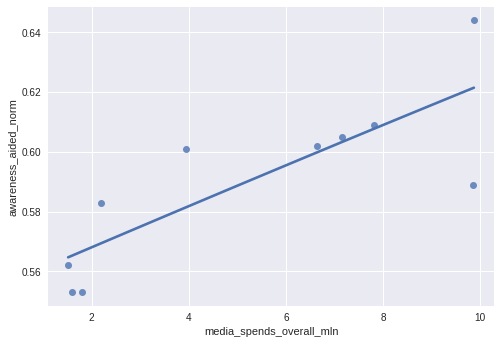

In [40]:
sns.regplot(x="media_spends_overall_mln",
            y="awareness_aided_norm",
            data=df_q,
            ci=None,
            logistic=True)

plt.show()

# HILL Function to forecasting aided awareness -- MAIN Version

### Functions

In [185]:
def apply_hill(x, k=0.95, s=3.0):
    # Classic Hill-Function
    return 1 / (1 + (k / x) ** (s))


def draw_curve(K, S, U, MAX_X, starting_level, MIN_X, STEP, scenarios,  is_save_plot=False, plt_name=None, brand_name=None):
    x = np.arange(MIN_X, MAX_X + STEP, STEP)
    y = U * apply_hill(x, float(K), float(S)) + starting_level
    x1 = np.array([
        scenarios[0]
        , scenarios[1]
        , scenarios[2]
    ])
    y1 = U * apply_hill(x1, float(K), float(S)) + starting_level
    fig = plt.figure(figsize = (15, 6))
    plt.plot(x, y)
    for i in range(len(x1)):
        roi = y1[i] / x1[i]
        # plt.scatter(
        #     x1[i],
        #     y1[i], 
            # label = f'Бюджет: {x1[i]}. Продажи: {y1[i]:.0f}. ROI = {roi:.2f}', 
            # c = 'r')
    plt.xlabel('Медиа-инвестиции, млн. руб.')
    plt.ylabel('Знание бренда, %')
    plt.title(f'Прогноз эффективности медиа-инвестиций для бренда {brand_name}')
    plt.legend()
    if is_save_plot:
        plt.savefig(f'{plt_name}.png')
    plt.show()


def predict_kpi(K, S, U, MAX_X, starting_level, MIN_X, STEP):
    x = np.arange(MIN_X, MAX_X + STEP, STEP)
    y = U * apply_hill(x, float(K), float(S)) + starting_level
    result = pd.DataFrame({
        'media_investments': x,
        'kpi_forecast': y
    })
    return result


def plot_saturation(data_col, brand_name):
    plt.figure(figsize = (15, 6))
    data_col.plot(color='red')
    plt.xlabel('Медиа-инвестиции, млн. руб.')
    plt.ylabel('Прирост знания бренда на единицу рекламных вложений')
    plt.title(f'График полезного эффекта медиа-инвестиций на знание бренда {brand_name}')
    plt.show()

### Forecasting and creating plot

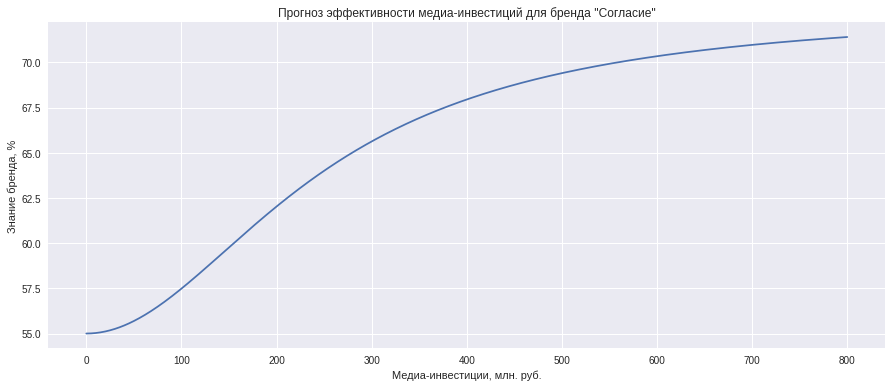

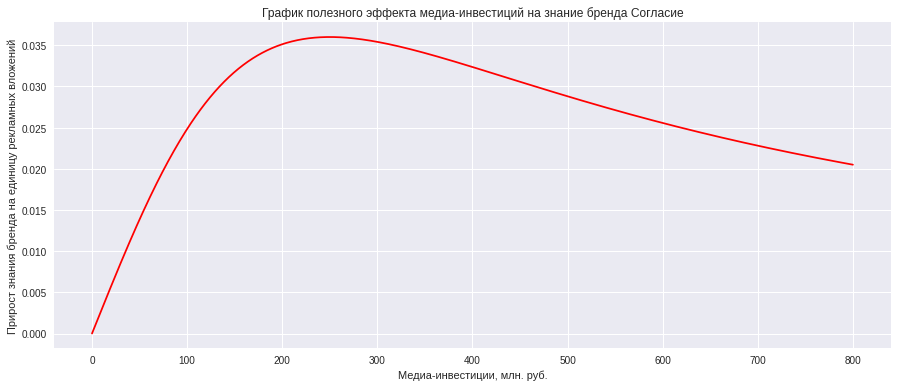

In [186]:
soglasie_scenarios = [
    50,
    75,
    100,
]

soglasie_params = {
    'K': 250, 
    'S': 2.00, 
    'U': 18, 
    'MAX_X': 800, 
    'starting_level': 55,
    'MIN_X': 0.000001, 
    'STEP': 1.0
}


draw_curve(
    soglasie_params['K'],
    soglasie_params['S'],
    soglasie_params['U'],
    soglasie_params['MAX_X'],
    soglasie_params['starting_level'],
    soglasie_params['MIN_X'],
    soglasie_params['STEP'],
    scenarios = soglasie_scenarios, 
    brand_name = '"Согласие"'
)

predicted_aided_awareness = predict_kpi(
    soglasie_params['K'],
    soglasie_params['S'],
    soglasie_params['U'],
    soglasie_params['MAX_X'],
    soglasie_params['starting_level'],
    soglasie_params['MIN_X'],
    soglasie_params['STEP']
)

base_level = predicted_aided_awareness.iloc[0, 1]

predicted_aided_awareness['increase_to_basic_level'] = predicted_aided_awareness['kpi_forecast'].sub(base_level)
predicted_aided_awareness['kpi_increase_per_step_of_investment'] = predicted_aided_awareness.increase_to_basic_level.div(predicted_aided_awareness.media_investments)


plot_saturation(predicted_aided_awareness.kpi_increase_per_step_of_investment, "Согласие")

### Save table for output

In [191]:
predicted_aided_awareness.to_csv('predicted_aided_awareness_01.csv')

# predicted_aided_awareness = predict_kpi(
#     soglasie_params['K'],
#     soglasie_params['S'],
#     soglasie_params['U'],
#     soglasie_params['MAX_X'],
#     soglasie_params['starting_level'],
#     soglasie_params['MIN_X'],
#     soglasie_params['STEP']
# )

# base_level = predicted_aided_awareness.iloc[0, 1]

# predicted_aided_awareness['increase_to_basic_level'] = predicted_aided_awareness['kpi_forecast'].sub(base_level)
# predicted_aided_awareness['kpi_increase_per_step_of_investment'] = predicted_aided_awareness.increase_to_basic_level.div(predicted_aided_awareness.media_investments)

# predicted_aided_awareness.to_csv('predicted_aided_awareness.csv')
# predicted_aided_awareness.head()

### Saturation plot of kpi

In [ ]:
# plot_saturation(predicted_aided_awareness.kpi_increase_per_step_of_investment)

In [147]:
# BETA Analogue

# predicted_aided_awareness.kpi_increase_per_step_of_investment.mean()

0.06798648500745742

In [192]:
# !ls

data_soglasie_mmm.xlsx	predicted_aided_awareness_01.csv
funk.py			predicted_aided_awareness.csv
